
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

La idea de analizar esta informacion proporcionada por la empresa Megaline es estudiar cual de los dos
planes de telefonia que ofrece (Surf, Ultimate) es mejor en terminos de ingresos; si podemos concluir
correctamente cual de los 2 planes genera mas ingresos entonces la empresa podra tomar decisiones con 
respecto al presupuesto asignado al departamento de marketing. Para lograr analizar y concluir la infomracion
lo primero es analizar la informacion brindada minusiosamente para conocer los datos y saber con que se
esta trabajando,ademas para detectar cualquier tipo de error que pueda interferir en el analisis correcto
de la informacion. Este analisis se hara a traves de hipotesis que probaremos con el analisis de datos
y al final podremos tener un panorama mas claro de que en cual plan la empresa Megaline deberia invertir
mas presupuesto para marketing.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
missing_values=plans.isnull().sum()

if missing_values.sum()==0:
    print('No hay valores ausentes en este dataframe')
else:
    print(missing_values)
    
duplicate_values=plans.duplicated().sum()

if duplicate_values.sum()==0:
    print('No hay valores duplicados en este dataframe')
else:
    print(duplicate_values)
    
print(plans.head())

No hay valores ausentes en este dataframe
No hay valores duplicados en este dataframe
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Segun esta revision de datos ausentes y datos duplicados en el DataFrame Plans, no hay ningun problema
con los datos. Las columnas tienen el tipo adecuado de datos siendo estos float64 para el valor en USD 
de cada mensaje y llamada; int64 para los numeros de mensajes y minutos en llamadas incluidas en cada
plan y tipo object para el nombre del plan.

## Corregir datos

Segun los analisis que hice anteriormente, no tengo datos por corregir en el DataFrame 'plans'.

## Enriquecer los datos

No agregaria valores adicionales en esta tabla de 'plans', pero lo mas probable que utilice los datos de esta tabla para enriquecer otras tablas que contengan mas informacion trabajable, como por ejemplo'users'.
Sin embargo, voy a convertir la columna mb_per_month_included de MB a GB para un analisis mas exacto.


In [5]:
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024
plans.drop('mb_per_month_included',axis=1,inplace=True)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   minutes_included       2 non-null      int64  
 2   usd_monthly_pay        2 non-null      int64  
 3   usd_per_gb             2 non-null      int64  
 4   usd_per_message        2 non-null      float64
 5   usd_per_minute         2 non-null      float64
 6   plan_name              2 non-null      object 
 7   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
missing_values=users.isnull().sum()
if missing_values.sum()==0:
    print('No hay valores ausentes en este DataFrame')
else:
    print('Estos son los valores ausentes:',missing_values)
duplicate_values=users.duplicated().sum()
if duplicate_values.sum()==0:
    print('No hay valores duplicados en este DatFrame')
else:
    print(duplicate_values)
print(users.head())


Estos son los valores ausentes: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
No hay valores duplicados en este DatFrame
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


En la informacion resumida del DataFrame 'users' encuentro que la mayoria de los datos parecen tener el tipo adecuado de acuerdo a la informacion, a excepcion de las columnas 'churn_date' y 'reg_date' deberian tener tipo 'datetime' como tipo de datos, ya que es informacion en terminos de fechas. Sin embargo, en el siguiente codigo para ejecutar la muestra, reviso si existen algunos valores nulos y/o duplicados, para saber si tengo algo que corregir;ya que contemplo la posibilidad de que la columna 'reg_date'tenga valores nulos para los clientes que siguen vigentes utilizando los servicios de Megaline. Despues de revisar lo anteriormente mencionado, encuentro que las columnas 'churn_date' tiene valores ausentes, sin embargo no es muy grave, ya que podria concluir que los valores ausentes son los clientes que aun estan vigentes usando alguno de los planes de Megaline.

### Corregir los datos

Voy a organizar la base de datos para poder analizar informacion mas adelante de las columnas 'churn_date' y 'reg_date' convirtiendo el tipo de datos de estas columnas a 'datetime'. Ademas voy a agregar una columna llamada 'month' que sera util a la hora de fusionar las bases de datos.

In [8]:
print(users.dtypes)



user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object


In [9]:
sample_date = users['reg_date'].iloc[0]
try:
    year, month, day = sample_date.split('-')
    print(f"Possible format: YYYY-MM-DD")
except ValueError:
    pass
try:
     month, day, year = sample_date.split('/')
     print(f"Possible format: MM-DD-YYYY")
except ValueError:
     pass
      

Possible format: YYYY-MM-DD


In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['month'] = users['reg_date'].dt.month

In [11]:
users['month'] = pd.to_datetime(users['month'], format='%m')

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   month       500 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 35.3+ KB


### Enriquecer los datos

No voy a unir bases de datos por ahora

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
missing_values=calls.isnull().sum()
if missing_values.sum()==0:
    print('No hay valores ausentes en este DataFrame')
else:
    print('Estos son los valores ausentes:',missing_values)
duplicate_values=calls.duplicated().sum()
if duplicate_values.sum()==0:
    print('No hay valores duplicados en este DataFrame')
else:
    print('Estos son los valores ausentes:',duplicate_values)
print(calls.head())



No hay valores ausentes en este DataFrame
No hay valores duplicados en este DataFrame
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Despues de analizar la base de datos 'calls' no encontre valores ausentes o duplicados; sin embargo, encontre que la columna 'call_date' tiene un tipo de datos 'object' lo que en un futuro no me permitira analizar la informacion adecuadamente, por lo tanto deberia cambiar estos datos a tipo 'datetime'.

### Corregir los datos

In [15]:
calls.dtypes



id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [16]:
#convertir 'call_date a datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [17]:
calls['month'] = calls['call_date'].dt.month
calls['month'] = pd.to_datetime(calls['month'], format='%m')

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 5.3+ MB


### Enriquecer los datos

No voy a modificar ni unir ninguna otra base de datos aqui. Las llamadas con duracion 0 podrian tener varias razones en este punto del analisis: 
1. Podrian considerarse llamdas no contestadas o fallidas, lo que significa que incluso pudieron ser cortadas inmediatamente despues de iniciadas
2. Tambien podrian ser un registro de eventyo del sistema, para contar los intentos de llamadas, incluso si no se completan o se abandonan
3. Estas llamadas podrian tambien representar errores en la base de datos causados por errrores tecnicos
4. Estas llamdas con duracion 0 tambien podrian significar marcaciones accidentales.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Imprime una muestra de datos para los mensajes
missing_values=messages.isnull().sum()
if missing_values.sum()==0:
    print('No hay valores ausentes en este DataFrame')
else:
    print('Estos son los valores ausentes:',missing_values)
duplicate_values=messages.duplicated().sum()
if duplicate_values.sum()==0:
    print('No hay valores duplicados en este DataFrame')
else:
    print('Estos son los valores ausentes:',duplicate_values)
print(messages.head())


No hay valores ausentes en este DataFrame
No hay valores duplicados en este DataFrame
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


No encontre datos ausentes y tampoco datos nulos; pero la columna 'message_date' es tipo object y deberia ser tipo 'datetime'para un mejor analisis de la informacion

### Corregir los datos

In [21]:
#verificar de nuevo los tipo de datos
print(messages.dtypes)

id              object
user_id          int64
message_date    object
dtype: object


In [22]:
#convertir la columna 'messages_date' a tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])
print(messages.dtypes)


id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


In [23]:
messages['month'] = messages['message_date'].dt.month
messages['month'] = pd.to_datetime(messages['month'], format='%m')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.3+ MB


### Enriquecer los datos

No voy a agregar o modificar nada en esta base de datos.

## Internet

In [24]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Imprime una muestra de datos para los mensajes
missing_values=internet.isnull().sum()
if missing_values.sum()==0:
    print('No hay valores ausentes en este DataFrame')
else:
    print('Estos son los valores ausentes:',missing_values)
duplicate_values=internet.duplicated().sum()
if duplicate_values.sum()==0:
    print('No hay valores duplicados en este DataFrame')
else:
    print('Estos son los valores ausentes:',duplicate_values)
print(internet.head())

No hay valores ausentes en este DataFrame
No hay valores duplicados en este DataFrame
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Una vez mas, este DataFrame no contiene valores ausentes ni valores duplicados, pero la columna 'session_date' es de tipo object lo que claramente puede interferir en el analisis de datos. Por lo tanto se debe convertir a tipo 'datetime'.

### Corregir los datos

In [26]:
internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [27]:
# verificando que formato de fecha tiene la columna 'session_date' antes de convertirla a 'datetime'
sample_date = internet['session_date'].iloc[0]
try:
    year, month, day = sample_date.split('-')
    print(f"Possible format: YYYY-MM-DD")
except ValueError:
    pass
try:
     month, day, year = sample_date.split('/')
     print(f"Possible format: MM-DD-YYYY")
except ValueError:
     pass

Possible format: YYYY-MM-DD


In [28]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
print(internet.dtypes)

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


In [29]:
internet['month'] = internet['session_date'].dt.month
internet['month'] = pd.to_datetime(internet['month'], format='%m')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


Enriquecer los datos

Voy a determinar que tipo de informacion voy a necesitar para validar o invalidar las hipotesis y asi poder saber cuales DataFrames deberia concatenar/fusionar.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

In [30]:
# condiciones de cada tarifa

# Crear una función para mostrar las condiciones de cada plan
def mostrar_condiciones(plans):
    print(f"Plan: {plans['plan_name']}")
    print(f"Mensajes incluidos: {plans['messages_included']}")
    print(f"Minutos incluidos: {plans['minutes_included']}")
    print(f"Gigabytes incluidos: {plans['gb_per_month_included']}")
    print(f"Pago mensual (USD): {plans['usd_monthly_pay']}")
    print(f"Precio por GB adicional (USD): {plans['usd_per_gb']}")
    print(f"Precio por mensaje adicional (USD): {plans['usd_per_message']}")
    print(f"Precio por minuto adicional (USD): {plans['usd_per_minute']}")
    print()

# Iterar sobre cada fila del DataFrame y mostrar las condiciones de cada plan
for index, plan in plans.iterrows():
    mostrar_condiciones(plan)



Plan: surf
Mensajes incluidos: 50
Minutos incluidos: 500
Gigabytes incluidos: 15.0
Pago mensual (USD): 20
Precio por GB adicional (USD): 10
Precio por mensaje adicional (USD): 0.03
Precio por minuto adicional (USD): 0.03

Plan: ultimate
Mensajes incluidos: 1000
Minutos incluidos: 3000
Gigabytes incluidos: 30.0
Pago mensual (USD): 70
Precio por GB adicional (USD): 7
Precio por mensaje adicional (USD): 0.01
Precio por minuto adicional (USD): 0.01



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [31]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_minutes = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
monthly_minutes.rename(columns={'duration': 'total_minutes'}, inplace=True)
minutes_per_month = pd.merge(calls, monthly_minutes, on=['user_id', 'month'], how='left')
minutes_per_month.to_csv('calls_with_monthly_minutes.csv', index=False)


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [32]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages.groupby(['user_id','month']).size().reset_index(name='total_messages')
messages_per_month = pd.merge(messages, monthly_messages, on=['user_id','month'],how='left')
messages_per_month.to_csv('messages_with_monthly_count.csv', index=False)

In [33]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_traffic = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
monthly_traffic.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)
internet_traffic_per_month = pd.merge(internet, monthly_traffic, on=['user_id', 'month'], how='left')
internet_traffic_per_month.to_csv('internet_with_monthly_traffic.csv', index=False)

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [34]:
#Voy a eliminar las columnas que no son necesarias para evitar duplicados cuando haga el merge
minutes_per_month = minutes_per_month[['user_id', 'month', 'total_minutes']]
messages_per_month = messages_per_month[['user_id', 'month', 'total_messages']]
internet_traffic_per_month = internet_traffic_per_month[['user_id', 'month', 'total_mb_used']]

In [35]:
# Optimizar tipos de datos
minutes_per_month['user_id'] = minutes_per_month['user_id'].astype('int32')
minutes_per_month['total_minutes'] = minutes_per_month['total_minutes'].astype('float32')

messages_per_month['user_id'] = messages_per_month['user_id'].astype('int32')
messages_per_month['total_messages'] = messages_per_month['total_messages'].astype('int32')

internet_traffic_per_month['user_id'] = internet_traffic_per_month['user_id'].astype('int32')
internet_traffic_per_month['total_mb_used'] = internet_traffic_per_month['total_mb_used'].astype('float32')


In [36]:
# Eliminar duplicados
minutes_per_month.drop_duplicates(inplace=True)
messages_per_month.drop_duplicates(inplace=True)
internet_traffic_per_month.drop_duplicates(inplace=True)

In [37]:
# Eliminar filas con valores nulos en las columnas clave
minutes_per_month.dropna(subset=['user_id', 'month'], inplace=True)
messages_per_month.dropna(subset=['user_id', 'month'], inplace=True)
internet_traffic_per_month.dropna(subset=['user_id', 'month'], inplace=True)


In [38]:
merged_df = pd.merge(minutes_per_month, messages_per_month, on=['user_id', 'month'], how='outer')
merged_df = pd.merge(merged_df, internet_traffic_per_month, on=['user_id', 'month'], how='outer')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [39]:
#voy a definir las condiciones de los planes para luego crear una funcion que me permita relacionar cad ausuario con el plan
surf_plan = {
    'plan_name': 'Surf',
    'usd_monthly_pay': 20,
    'minutes_included': 500,
    'messages_included': 50,
    'mb_per_month_included': 15360 * 1024,  # Convertir GB a MB
    'usd_per_minute': 0.03,
    'usd_per_message': 0.03,
    'usd_per_gb': 10
}

ultimate_plan = {
    'plan_name': 'Ultimate',
    'usd_monthly_pay': 70,
    'minutes_included': 3000,
    'messages_included': 1000,
    'mb_per_month_included': 30720 * 1024,  # Convertir GB a MB
    'usd_per_minute': 0.01,
    'usd_per_message': 0.01,
    'usd_per_gb': 7
}
def asignar_plan(row):
    if row['total_minutes'] <= surf_plan['minutes_included'] and \
       row['total_messages'] <= surf_plan['messages_included'] and \
       row['total_mb_used'] <= surf_plan['mb_per_month_included']:
        return surf_plan['plan_name']
    else:
        return ultimate_plan['plan_name']
merged_df['plan_name'] = merged_df.apply(asignar_plan, axis=1)

#aqui voy a calcular los ingresos mensuales por usuario
def calcular_ingresos(row):
    if row['plan_name'] == surf_plan['plan_name']:
        excess_minutes = max(row['total_minutes'] - surf_plan['minutes_included'], 0)
        excess_messages = max(row['total_messages'] - surf_plan['messages_included'], 0)
        excess_mb = max(row['total_mb_used'] - surf_plan['mb_per_month_included'], 0)
        income_from_minutes = excess_minutes * surf_plan['usd_per_minute']
        income_from_messages = excess_messages * surf_plan['usd_per_message']
        income_from_mb = excess_mb * surf_plan['usd_per_gb'] / 1024  # Convertir MB a GB
        total_income = surf_plan['usd_monthly_pay'] + income_from_minutes + income_from_messages + income_from_mb
        return total_income
    else:
        excess_minutes = max(row['total_minutes'] - ultimate_plan['minutes_included'], 0)
        excess_messages = max(row['total_messages'] - ultimate_plan['messages_included'], 0)
        excess_mb = max(row['total_mb_used'] - ultimate_plan['mb_per_month_included'], 0)
        income_from_minutes = excess_minutes * ultimate_plan['usd_per_minute']
        income_from_messages = excess_messages * ultimate_plan['usd_per_message']
        income_from_mb = excess_mb * ultimate_plan['usd_per_gb'] / 1024  # Convertir MB a GB
        total_income = ultimate_plan['usd_monthly_pay'] + income_from_minutes + income_from_messages + income_from_mb
        return total_income

merged_df['total_income'] = merged_df.apply(calcular_ingresos, axis=1)
print(merged_df.head())


   user_id      month  total_minutes  total_messages  total_mb_used plan_name  \
0     1000 1900-12-01     116.830002            11.0    1901.469971      Surf   
1     1001 1900-09-01     297.690002            44.0   13314.820312      Surf   
2     1001 1900-10-01     374.109985            53.0   22330.490234  Ultimate   
3     1001 1900-12-01     392.929993            44.0   19369.179688      Surf   
4     1001 1900-11-01     404.589996            36.0   18504.300781      Surf   

   total_income  
0          20.0  
1          20.0  
2          70.0  
3          20.0  
4          20.0  


## Estudia el comportamiento de usuario

### Llamadas

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

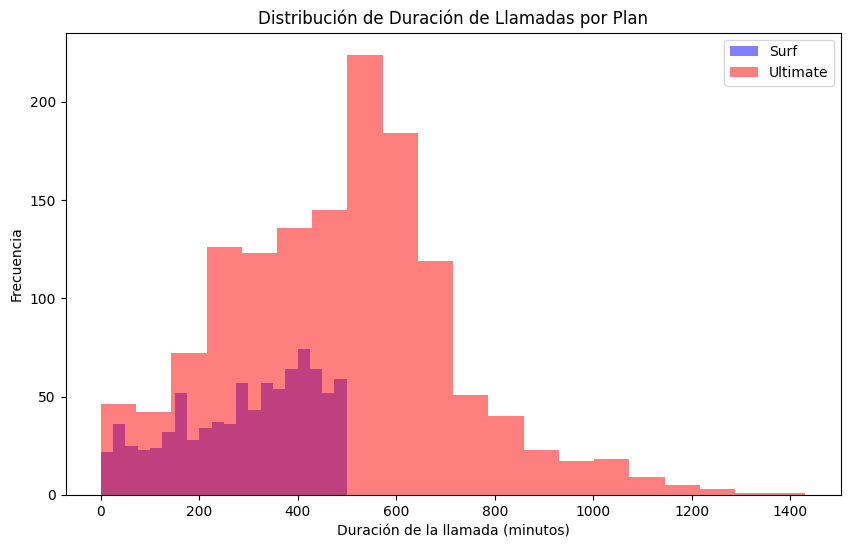

In [40]:
# Datos de duración de llamadas para cada plan
surf_duration = merged_df[merged_df['plan_name'] == 'Surf']['total_minutes']
ultimate_duration = merged_df[merged_df['plan_name'] == 'Ultimate']['total_minutes']

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma de duración de llamadas para el plan Surf
plt.hist(surf_duration, bins=20, alpha=0.5, label='Surf', color='blue')

# Histograma de duración de llamadas para el plan Ultimate
plt.hist(ultimate_duration, bins=20, alpha=0.5, label='Ultimate', color='red')

# Título y etiquetas de los ejes
plt.title('Distribución de Duración de Llamadas por Plan')
plt.xlabel('Duración de la llamada (minutos)')
plt.ylabel('Frecuencia')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

Independientemente del plan que tengan los usuarios, parece ser que los usuarios no sobrepasan los minutos incluidos en su plan; sin embargo, los usuarios del plan ultimate tienden a realizar llamadas mas frecuentemente.

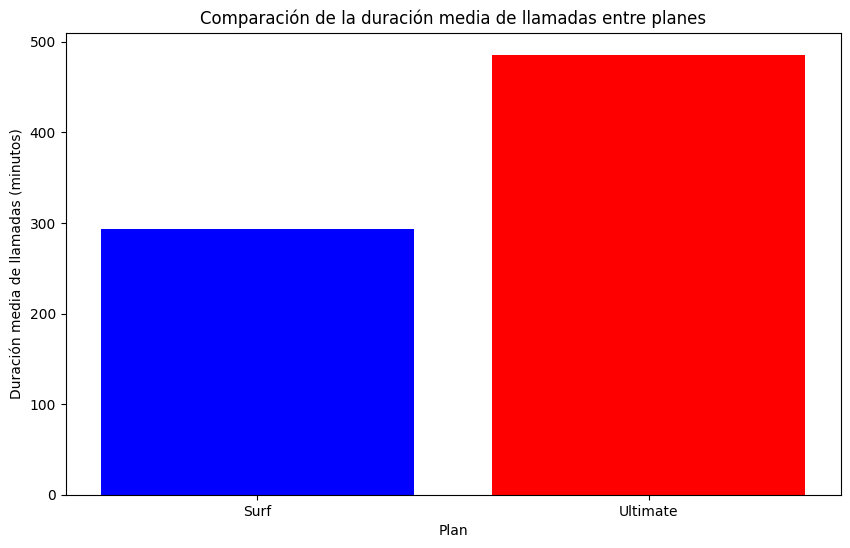

In [41]:
surf_mean = merged_df[merged_df['plan_name'] == 'Surf']['total_minutes'].mean()
surf_var = merged_df[merged_df['plan_name'] == 'Surf']['total_minutes'].var()

ultimate_mean = merged_df[merged_df['plan_name'] == 'Ultimate']['total_minutes'].mean()
ultimate_var = merged_df[merged_df['plan_name'] == 'Ultimate']['total_minutes'].var()

# Gráfico de barras para comparar las medias de duración de llamadas entre los planes
plt.figure(figsize=(10, 6))
plt.bar(['Surf', 'Ultimate'], [surf_mean, ultimate_mean], color=['blue', 'red'])
plt.title('Comparación de la duración media de llamadas entre planes')
plt.xlabel('Plan')
plt.ylabel('Duración media de llamadas (minutos)')
plt.show()

Tal como dije de la grafica anterior, los usuarios del plan ultimate tienden a realizar mas llamadas que los usuarios del plan surf. 

de las graficas anteriores se puede concluir entonces que los usuarios si se comportan diferente de acuerdo al plan que tienen, ya que los usuarios del plan ultimate tienden a realizar mas llamadas porque tienen mas disponibilidad de minutos.

### Mensajes

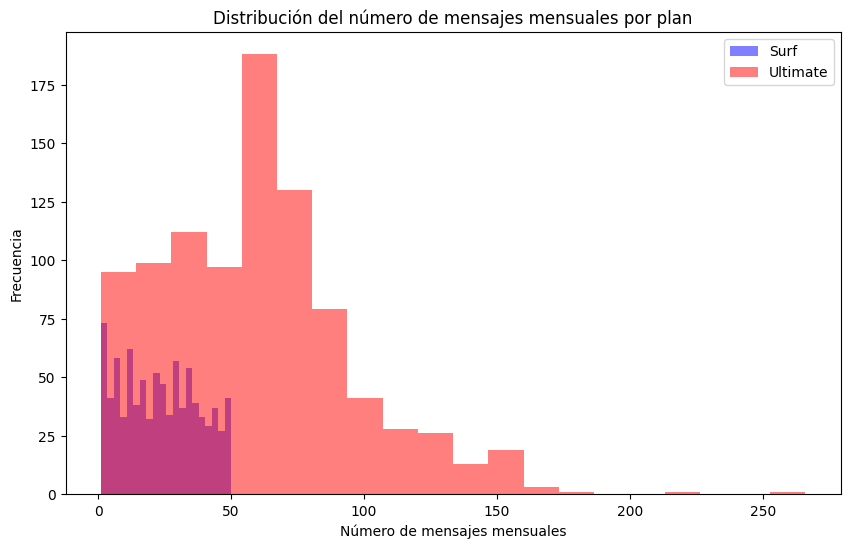

In [42]:
#Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma
# Filtrar los datos por plan y obtener el número de mensajes mensuales
surf_messages = merged_df[merged_df['plan_name'] == 'Surf']['total_messages']
ultimate_messages = merged_df[merged_df['plan_name'] == 'Ultimate']['total_messages']
plt.figure(figsize=(10, 6))
plt.hist(surf_messages, bins=20, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_messages, bins=20, alpha=0.5, label='Ultimate', color='red')
plt.title('Distribución del número de mensajes mensuales por plan')
plt.xlabel('Número de mensajes mensuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

En esta grafica se muestra que los usuarios del plan surf utilizan mas mensajes de texto que los usuarios del plan ultimate, sin embargo el uso de los mensajes de texto en el plan surf no es tan frecuente. Se observa tambien que los usuarios del plan ultimate envian mas frecuentemente entre 50-100 mensajes de texto al mes cuando tienen disponibles 1000.

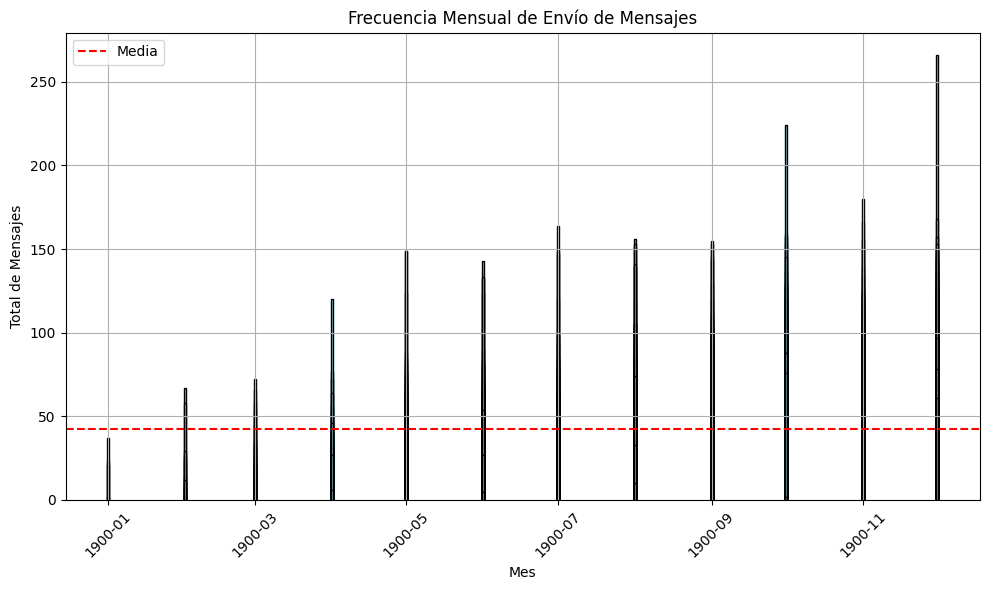

In [43]:
#Calcula la media y la varianza de la frecuencia mensual de envio de mensajes.
mean_messages = merged_df['total_messages'].mean()
variance_messages = merged_df['total_messages'].var()
plt.figure(figsize=(10, 6))
plt.bar(merged_df['month'], merged_df['total_messages'], color='skyblue', edgecolor='black')
plt.title('Frecuencia Mensual de Envío de Mensajes')
plt.xlabel('Mes')
plt.ylabel('Total de Mensajes')
plt.xticks(rotation=45)
plt.grid(True)
plt.axhline(mean_messages, color='r', linestyle='--', label='Media')
plt.legend()
plt.tight_layout()
plt.show()


Segun estos datos los usuarios no utilizan mucho el servicio de mensajes de texto independientemente del plan al que esten suscritos.

### Internet

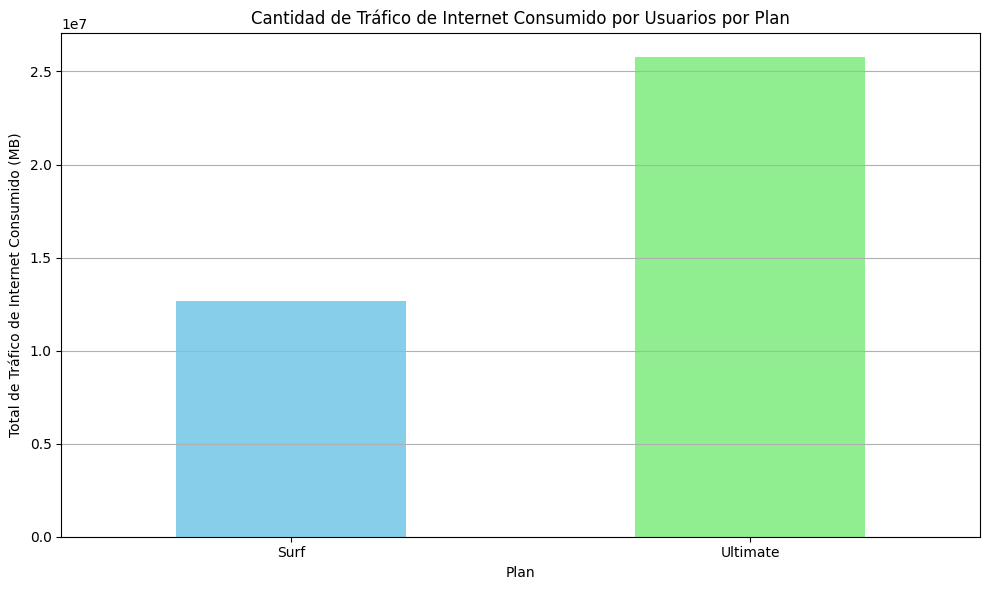

In [44]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_traffic_by_plan = merged_df.groupby('plan_name')['total_mb_used'].sum()
plt.figure(figsize=(10, 6))
internet_traffic_by_plan.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Cantidad de Tráfico de Internet Consumido por Usuarios por Plan')
plt.xlabel('Plan')
plt.ylabel('Total de Tráfico de Internet Consumido (MB)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

En esta grafica se observa que los usuarios no alcanzan a consumir la cantidad de GB incluidos mensualmente en sus respectivos plane; aunque los usuarios del plan ultimate hacen mas uso de su GB disponibles.

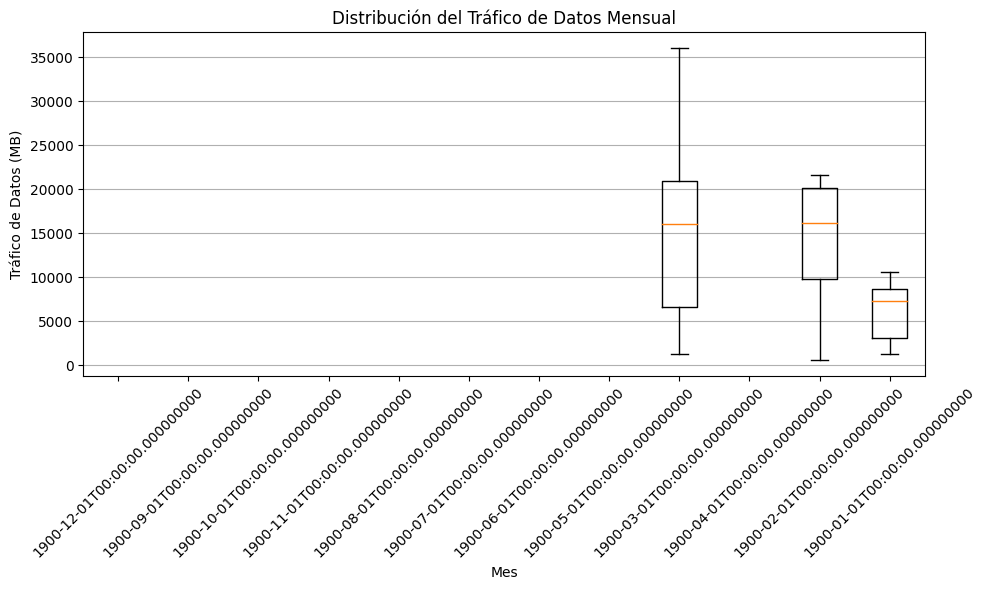

In [45]:
#Traza un diagrama de caja para visualizar la distribución del trafico de datos mensual
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df[merged_df['month'] == month]['total_mb_used'] for month in merged_df['month'].unique()], 
            labels=merged_df['month'].unique())
plt.title('Distribución del Tráfico de Datos Mensual')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Datos (MB)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Al parecer el mayor trafico de internet usado ocurrio en Mayo, posiblemente por alguna promocion adicional, o incluso porque es un mes bastante comercial al celebrarse casi internacionalmente el dia de la madre.

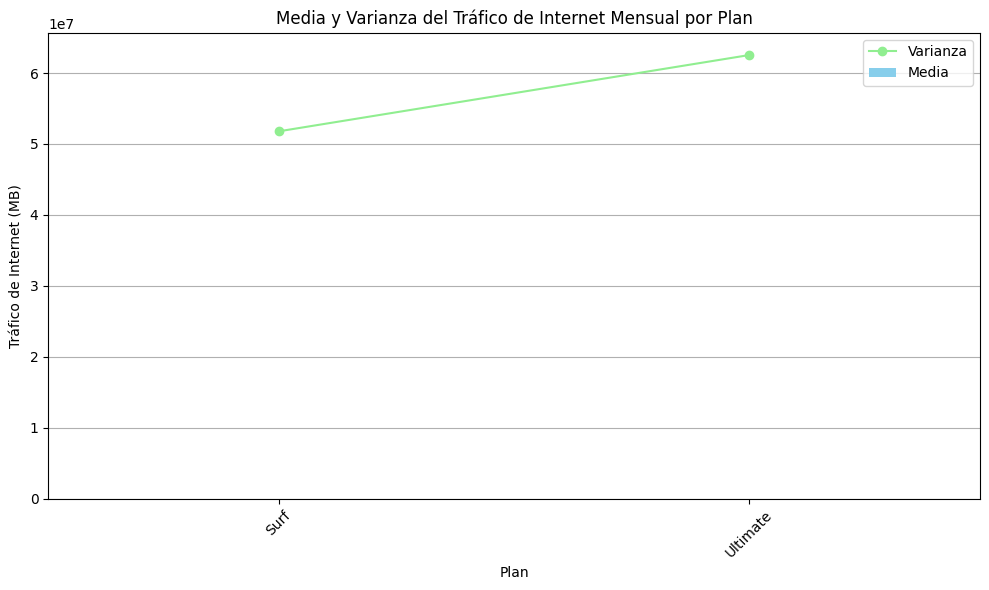

In [46]:
# Calcular la media y la varianza del tráfico de internet mensual por plan
traffic_mean = merged_df.groupby('plan_name')['total_mb_used'].mean()
traffic_variance = merged_df.groupby('plan_name')['total_mb_used'].var()
plt.figure(figsize=(10, 6))
plt.bar(traffic_mean.index, traffic_mean, color='skyblue', label='Media')
plt.plot(traffic_variance.index, traffic_variance, marker='o', linestyle='-', color='lightgreen', label='Varianza')
plt.title('Media y Varianza del Tráfico de Internet Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet (MB)')
plt.grid(axis='y')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analizando el tráfico de Internet mensual por plan, la varianza alta podría indicar que hay una amplia variabilidad en la cantidad de datos utilizados por los usuarios en cada plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

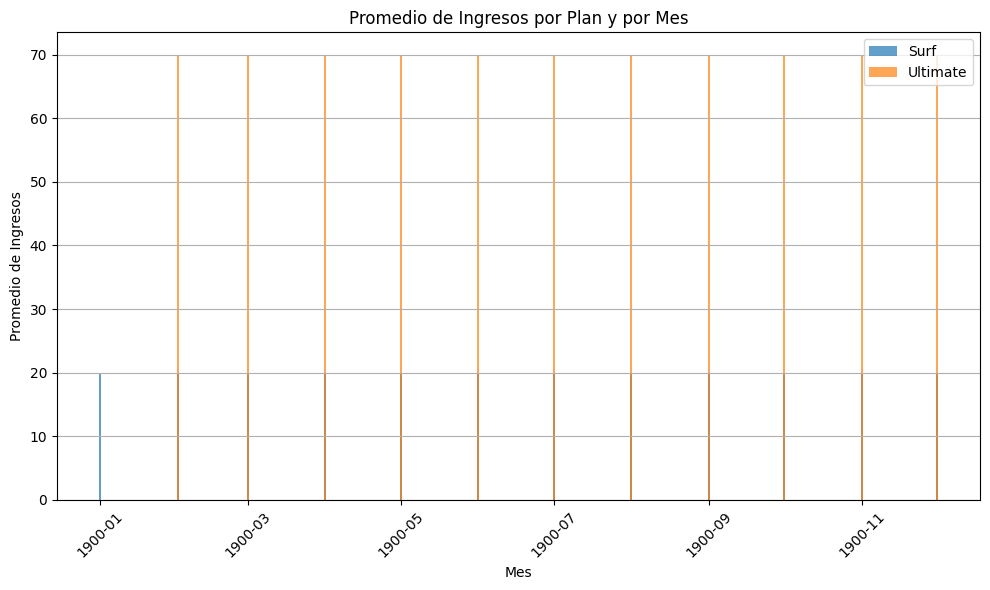

In [47]:
# Compara el promedio de ingresos por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
income_avg = merged_df.groupby(['plan_name', 'month'])['total_income'].mean().reset_index()
plt.figure(figsize=(10, 6))
for plan in income_avg['plan_name'].unique():
    plt.bar(income_avg[income_avg['plan_name'] == plan]['month'], 
            income_avg[income_avg['plan_name'] == plan]['total_income'], 
            alpha=0.7, label=plan)
plt.title('Promedio de Ingresos por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ingresos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

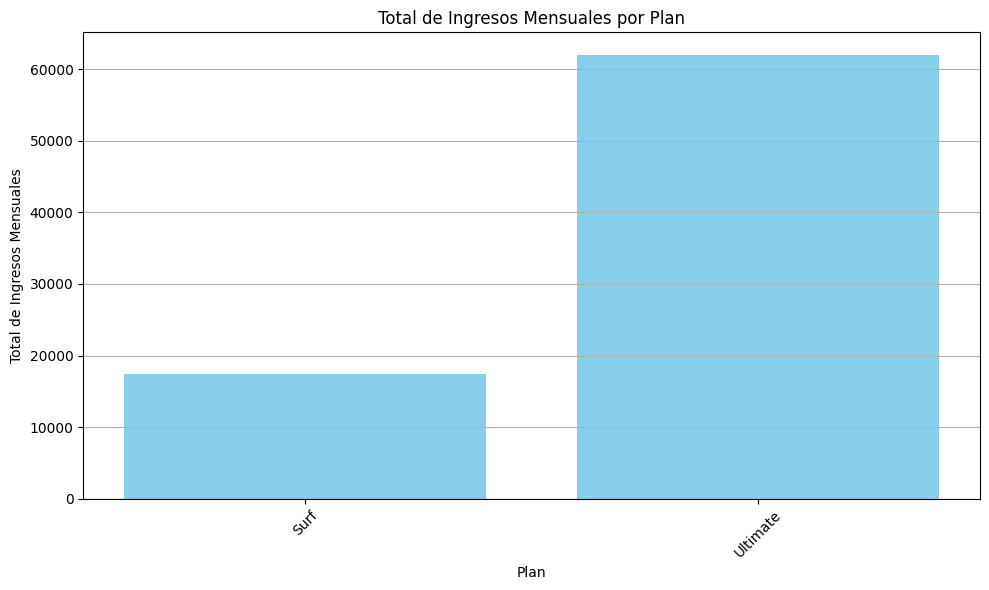

In [48]:
# Compara el total de ingresos mensuales que pagan los usuarios de cada plan. Traza un histograma.
income_total_by_plan = merged_df.groupby('plan_name')['total_income'].sum()
plt.figure(figsize=(10, 6))
plt.bar(income_total_by_plan.index, income_total_by_plan, color='skyblue')
plt.title('Total de Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Total de Ingresos Mensuales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

En una de las graficas podemos observar claramente que el plan ultimate es el que mas ingresos le genera a Megaline, probablemente porque tiene un costo mas alto para los usuarios

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [49]:
# Prueba las hipótesis

# Separar los datos de los ingresos para los dos grupos (Ultimate y Surf)
income_ultimate = merged_df[merged_df['plan_name'] == 'Ultimate']['total_income']
income_surf = merged_df[merged_df['plan_name'] == 'Surf']['total_income']

# Realizar la prueba t de Student para comparar las medias de los ingresos de los dos grupos
t_statistic, p_value = ttest_ind(income_ultimate, income_surf)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.")
else:
    print("No hay evidencia suficiente para concluir que hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.")

No hay evidencia suficiente para concluir que hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.


/tmp/ipykernel_106/370582702.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(income_ultimate, income_surf)


In [50]:
from scipy.stats import mannwhitneyu

# Separar los datos de los ingresos para los dos grupos (Ultimate y Surf)
income_ultimate = merged_df[merged_df['plan_name'] == 'Ultimate']['total_income']
income_surf = merged_df[merged_df['plan_name'] == 'Surf']['total_income']

# Realizar la prueba de Wilcoxon-Mann-Whitney para comparar los ingresos de los dos grupos
statistic, p_value = mannwhitneyu(income_ultimate, income_surf)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.")
else:
    print("No hay evidencia suficiente para concluir que hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.")


No hay evidencia suficiente para concluir que hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.


Despues de aplicar dos pruebas diferentes para probar la hipotesis, encontramos que no hay evidencia suficiente para concluir una diferencia significativa entre los ingresos generados de los planes Surf y Ultimate.

In [51]:
# Unir la columna 'city' al dataframe 'merged_df'
merged_df = pd.merge(merged_df, users[['user_id', 'city']], on='user_id', how='left')
print(merged_df.head())

   user_id      month  total_minutes  total_messages  total_mb_used plan_name  \
0     1000 1900-12-01     116.830002            11.0    1901.469971      Surf   
1     1001 1900-09-01     297.690002            44.0   13314.820312      Surf   
2     1001 1900-10-01     374.109985            53.0   22330.490234  Ultimate   
3     1001 1900-12-01     392.929993            44.0   19369.179688      Surf   
4     1001 1900-11-01     404.589996            36.0   18504.300781      Surf   

   total_income                                   city  
0          20.0  Atlanta-Sandy Springs-Roswell, GA MSA  
1          20.0        Seattle-Tacoma-Bellevue, WA MSA  
2          70.0        Seattle-Tacoma-Bellevue, WA MSA  
3          20.0        Seattle-Tacoma-Bellevue, WA MSA  
4          20.0        Seattle-Tacoma-Bellevue, WA MSA  


In [52]:
# Prueba las hipótesis
income_ny_nj = merged_df[merged_df['city'].isin(['New York', 'New Jersey'])]['total_income']
income_other_regions = merged_df[~merged_df['city'].isin(['New York', 'New Jersey'])]['total_income']
t_statistic, p_value = ttest_ind(income_ny_nj, income_other_regions, equal_var=False)
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre el ingreso promedio de los usuarios del área NY-NJ y los de otras regiones.")
else:
    print("No hay evidencia suficiente para concluir que hay una diferencia significativa entre el ingreso promedio de los usuarios del área NY-NJ y los de otras regiones.")

No hay evidencia suficiente para concluir que hay una diferencia significativa entre el ingreso promedio de los usuarios del área NY-NJ y los de otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

De acuerdo al analisis realizado, no existe una evidencia significativa para decir que los usuarios se comportan diferente de acuerdo a la ciudad o que generan mas o menos ingresos de acuerdo a la region donde se encuentre.

## Conclusión general

1. Fue dificil hacer suposiciones con los datos porque encontre muy dificil poder limpiar y trabajar con los datos.
2. No confio en la limpieza y fusion de datos que realice con las bases de datos porque siento que las graficas y los resultados de los analisis son muy confusos.
3. Fue bastante retador tratar de probar las hipotesis con unos datos que no estoy segura que esten correctos.
4. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Solamente te recomiendo que complementes con una conclusión general con todos los hallazgos del proyecto. Que sigas disfrutando los siguientes cursos!
</div>